# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Getting the Data

In [3]:
df = pd.read_csv('titanic_dataset.csv')

## Data Exploration/Analysis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
total =df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [8]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## features that could contribute to a high survival rate

### 1. Age and Sex:

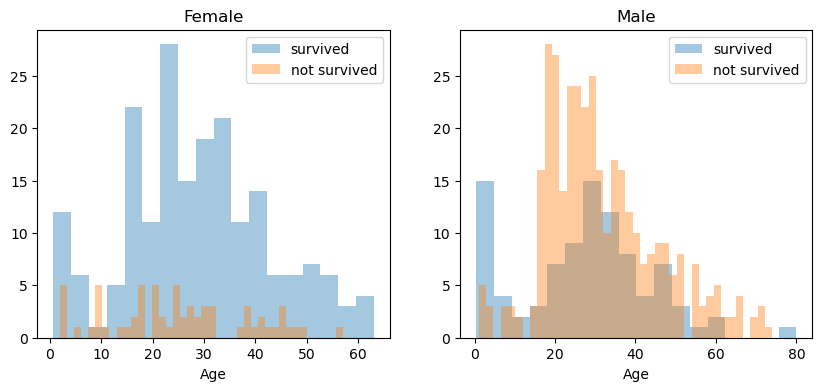

In [9]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

### 2. Embarked, Pclass and Sex:

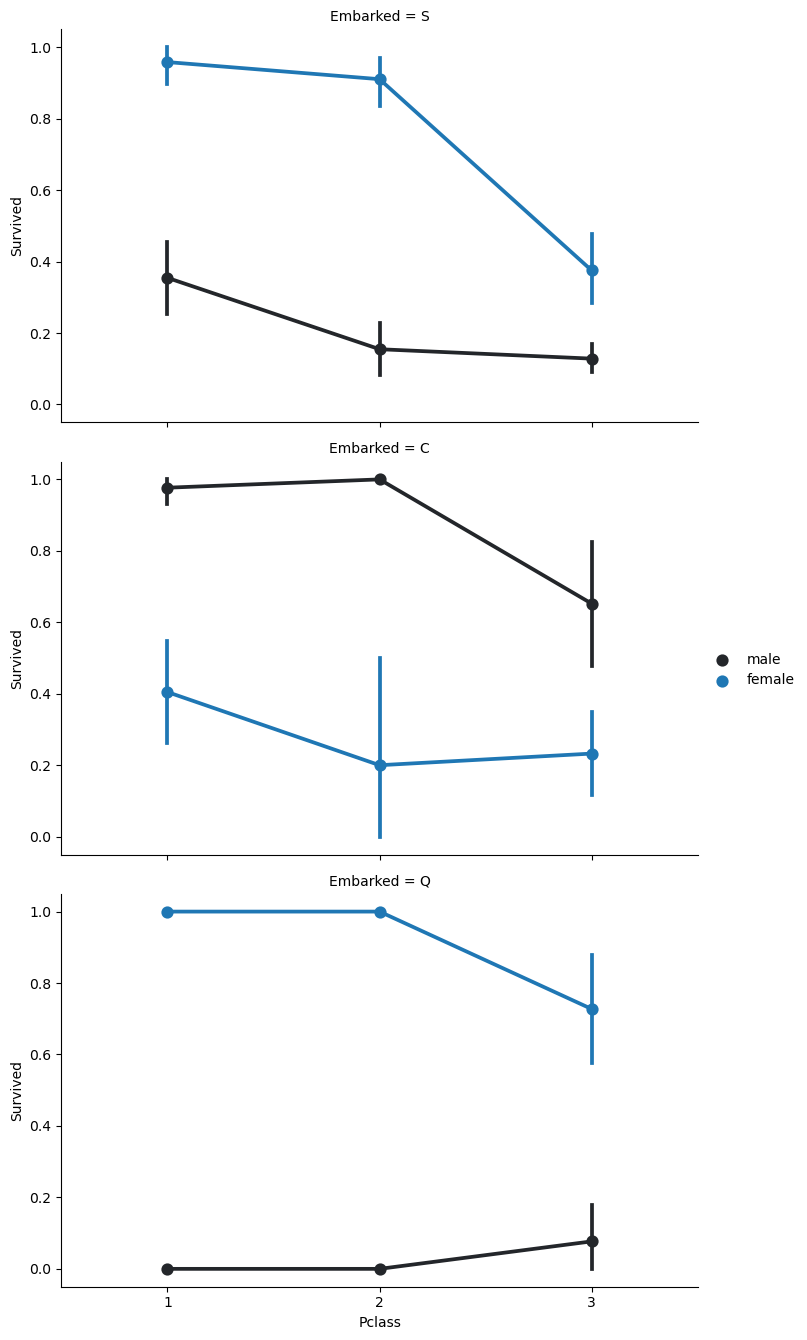

In [10]:
FacetGrid = sns.FacetGrid(df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

### 3. Pclass:

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

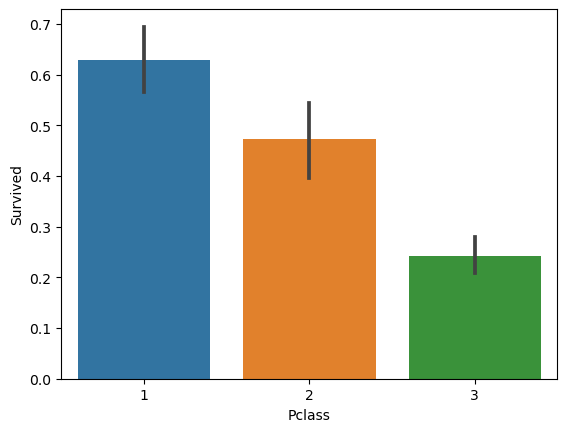

In [11]:
sns.barplot(x='Pclass', y='Survived', data=df)

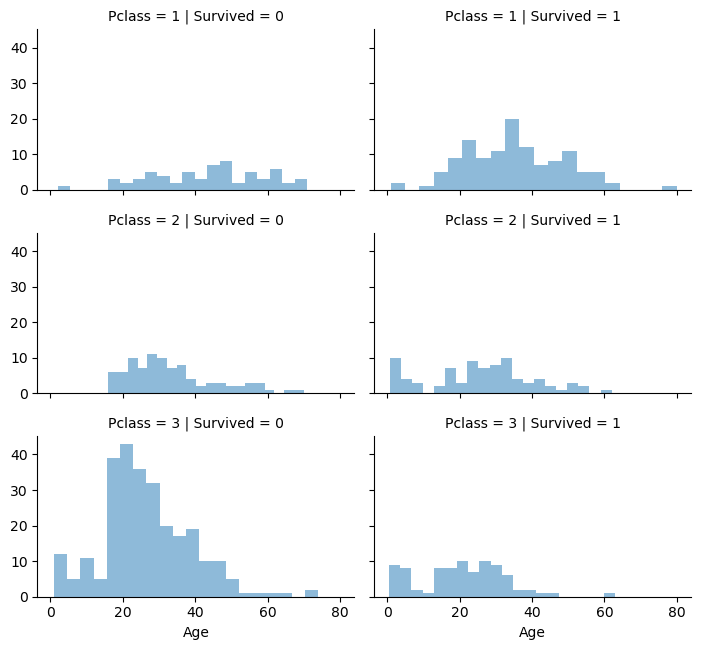

In [12]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### 4. SibSp and Parch:

In [13]:
data = [df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

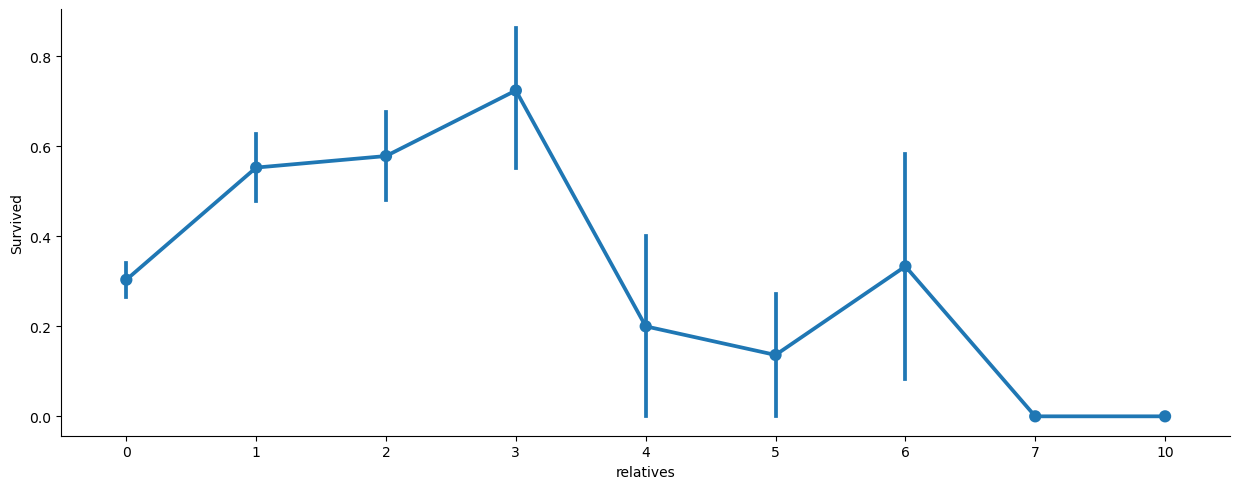

In [14]:
axes = sns.factorplot('relatives','Survived', 
                      data=df, aspect = 2.5, )

# Data Preprocessing


In [15]:
df = df.drop(['PassengerId'], axis=1)

### dealing with Missing Data:

In [16]:
#cabin
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
df = df.drop(['Cabin'], axis=1)


In [17]:
#age
data = [df]

for dataset in data:
    mean = df["Age"].mean()
    std = df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df["Age"].astype(int)
df["Age"].isnull().sum()

0

In [18]:
#embarked
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
common_value = 'S'
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

### Converting Features:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [21]:
#Converting “Fare” from float to int64, using the “astype()” function pandas provides:
data = [df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [22]:
#We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

data = [df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
df = df.drop(['Name'], axis=1)


In [23]:
#Converting ‘Sex’ feature into numeric.
genders = {"male": 0, "female": 1}
data = [df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [24]:
#ticket
df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [25]:
df=df.drop(['Ticket'], axis=1)
#Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories.
#So we dropped it from the dataset.


In [26]:
# Converting ‘Embarked’ feature into numeric.
ports = {"S": 0, "C": 1, "Q": 2}
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### Creating Categories:

In [27]:
data = [df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

df['Age'].value_counts()

6    170
4    153
5    149
3    135
2    115
1    101
0     68
Name: Age, dtype: int64

In [28]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,5,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [29]:
#Fare
data = [df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

### Creating new Features

#### 1. Age times Class

In [30]:
data = [df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

#### 2. Fare per Person

In [31]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [32]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,5,0,0,1,2,0,1,8,1,15,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Survived         891 non-null    int64
 1   Pclass           891 non-null    int64
 2   Sex              891 non-null    int64
 3   Age              891 non-null    int64
 4   SibSp            891 non-null    int64
 5   Parch            891 non-null    int64
 6   Fare             891 non-null    int64
 7   Embarked         891 non-null    int64
 8   relatives        891 non-null    int64
 9   not_alone        891 non-null    int64
 10  Deck             891 non-null    int64
 11  Title            891 non-null    int64
 12  Age_Class        891 non-null    int64
 13  Fare_Per_Person  891 non-null    int64
dtypes: int64(14)
memory usage: 97.6 KB


## Spliting for training and testing

In [34]:
x = df.drop("Survived", axis=1)
y = df["Survived"]


In [35]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,5,1,0,3,0,1,0,3,3,5,1
4,3,0,5,0,0,1,0,0,1,8,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,3,0,0,1,0,0,1,8,5,6,1
887,1,1,2,0,0,2,0,0,1,2,2,2,2
888,3,1,5,1,2,2,0,3,0,8,2,15,0
889,1,0,3,0,0,2,1,0,1,3,1,3,2


In [36]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

In [38]:
x_train.shape

(668, 13)

In [39]:
y_train.shape

(668,)

# Building the kNN model

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1, 15)


for k in neighbors:
    knnclf = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    knnclf.fit (x_train,y_train)
    y_pred_knn = knnclf.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

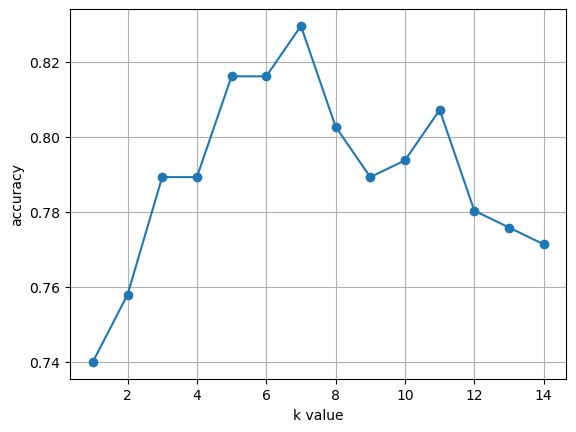

In [42]:
plt.plot (neighbors, metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [43]:
knnclf = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
knnclf.fit (x_train,y_train)
y_pred_knn = knnclf.predict(x_test)
acc = accuracy_score(y_test,y_pred_knn)

## Evaluating the k-NN model

In [44]:
print('accuracy = ', accuracy_score(y_test,y_pred_knn))

accuracy =  0.8295964125560538


In [45]:
print( confusion_matrix(y_test,y_pred_knn))

[[123  11]
 [ 27  62]]


In [46]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       134
           1       0.85      0.70      0.77        89

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



In [47]:
acc_knn=accuracy_score(y_test,y_pred_knn )*100
print("Accuracy of the model is {:.2f}".format(acc_knn))

Accuracy of the model is 82.96


# Building the SVM model (kernal = linear)

In [48]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [49]:
y_pred_svm = svmclf.predict (x_test)

## Evaluating the SVM_linear model

In [50]:
print('accuracy = ', accuracy_score(y_test,y_pred_svm))

accuracy =  0.8116591928251121


In [51]:
print( confusion_matrix(y_test,y_pred_svm))

[[113  21]
 [ 21  68]]


In [52]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       134
           1       0.76      0.76      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [53]:
acc_svm_linear=accuracy_score(y_test,y_pred_svm)*100
print("Accuracy of the model is {:.2f}".format(acc_svm_linear))

Accuracy of the model is 81.17


# Building the SVM model (kernal = RBF)

In [54]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'rbf')
svmclf.fit(x_train,y_train)

SVC()

In [55]:
y_pred_svm = svmclf.predict (x_test)

## Evaluating the SVM_rbf model

In [56]:
print('accuracy = ',accuracy_score(y_test,y_pred_svm))

accuracy =  0.8161434977578476


In [57]:
print( confusion_matrix(y_test,y_pred_svm))

[[117  17]
 [ 24  65]]


In [58]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.79      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.81      0.82      0.81       223



In [59]:
acc_svm_rbf=accuracy_score(y_test,y_pred_svm)*100
print("Accuracy of the model is {:.2f}".format(acc_svm_rbf))

Accuracy of the model is 81.61


# Building the SVM model (kernal = polynomial)

In [60]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'poly')
svmclf.fit(x_train,y_train)

SVC(kernel='poly')

In [61]:
y_pred_svm = svmclf.predict (x_test)

## Evaluating the SVM_poly model

In [62]:
print('accuracy = ',accuracy_score(y_test,y_pred_svm))

accuracy =  0.7847533632286996


In [63]:
print( confusion_matrix(y_test,y_pred_svm))

[[99 35]
 [13 76]]


In [64]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80       134
           1       0.68      0.85      0.76        89

    accuracy                           0.78       223
   macro avg       0.78      0.80      0.78       223
weighted avg       0.80      0.78      0.79       223



In [65]:
acc_svm_poly=accuracy_score(y_test,y_pred_svm)*100
print("Accuracy of the model is {:.2f}".format(acc_svm_poly))

Accuracy of the model is 78.48


In [66]:
results = pd.DataFrame ({
    'Model': ['KNN','SVM_linear','SVM_rbf','SVM_poly'],
    'Score': [acc_knn, acc_svm_linear,acc_svm_rbf,acc_svm_poly]
                                        })
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
82.959641,KNN
81.614350,SVM_rbf
81.165919,SVM_linear
78.475336,SVM_poly


# K-Fold Cross Validation:

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold



In [68]:
kfold_validator=KFold(10)

In [69]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training index:',train_index)
    print('Testing index:',test_index)

Training index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

### for kNN :

In [70]:
knnclf = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
scores = cross_val_score(knnclf, x_train, y_train,scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.73880597 0.76119403 0.78358209 0.78947368 0.81203008]
Mean: 0.7770171697901469
Standard Deviation: 0.02503850635690067


##### kNN model has a average accuracy of 77.7% with a standard deviation of 2.5 %.This means in this case that the accuracy of kNN model can differ + — 2.5%.

### for SVM_linear : 

In [71]:
svmclf = SVC(kernel = 'linear')
scores = cross_val_score(svmclf, x_train, y_train,scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80597015 0.86567164 0.76865672 0.79699248 0.84962406]
Mean: 0.817383009763214
Standard Deviation: 0.03547268249324495


##### SVM_linear model has a average accuracy of 81.7% with a standard deviation of 3.5%.This means in this case that the accuracy of SVM_linear model can differ + — 3.5%.

### for SVM_rbf :

In [72]:
svmclf = SVC(kernel = 'rbf')
scores = cross_val_score(svmclf, x_train, y_train,scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80597015 0.81343284 0.78358209 0.81203008 0.82706767]
Mean: 0.8084165637975536
Standard Deviation: 0.014204367190872938


##### SVM_rbf model has a average accuracy of 80.8% with a standard deviation of 1.4%.This means in this case that the accuracy of SVM_rbf model can differ + — 1.4%.

### for SVM_poly :

In [73]:
svmclf = SVC(kernel = 'poly')
scores = cross_val_score(svmclf, x_train, y_train,scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82835821 0.80597015 0.78358209 0.76691729 0.81203008]
Mean: 0.7993715632364493
Standard Deviation: 0.02166375781325025


##### SVM_poly model has a average accuracy of 79.9% with a standard deviation of  2.1%.This means in this case that the accuracy of SVM_rbf model can differ + —2.1%.

# Stratified K- Fold Cross validation

In [74]:
from sklearn.model_selection import StratifiedKFold

In [75]:
skfold_validator=StratifiedKFold(10)

In [76]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training index:',train_index)
    print('Testing index:',test_index)

Training index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

### for kNN :

In [77]:
skcv_score=cross_val_score( knnclf ,x,y,cv=skfold_validator)

In [78]:
print("Scores:",skcv_score)
print("Mean:", skcv_score.mean())
print("Standard Deviation:", skcv_score.std())

Scores: [0.67777778 0.79775281 0.74157303 0.80898876 0.80898876 0.76404494
 0.78651685 0.79775281 0.82022472 0.75280899]
Mean: 0.7756429463171036
Standard Deviation: 0.04086760201415826


##### kNN model has a average accuracy of 77.5% with a standard deviation of 4.0%.This means in this case that the accuracy of kNN model can differ + — 4.0%.

### for SVM_linear :

In [79]:
svmclf = SVC(kernel = 'linear')
skcv_score=cross_val_score( svmclf ,x,y,cv=skfold_validator)

In [80]:
print("Scores:",skcv_score)
print("Mean:", skcv_score.mean())
print("Standard Deviation:", skcv_score.std())

Scores: [0.82222222 0.84269663 0.75280899 0.86516854 0.80898876 0.79775281
 0.80898876 0.78651685 0.82022472 0.80898876]
Mean: 0.8114357053682897
Standard Deviation: 0.028846635485828803


##### SVM_linear model has a average accuracy of 81.1% with a standard deviation of 2.8%.This means in this case that the accuracy of SVM_linear model can differ + —2.8%.

### for SVM_rbf :

In [81]:
svmclf = SVC(kernel = 'rbf')
skcv_score=cross_val_score( svmclf ,x,y,cv=skfold_validator)

In [82]:
print("Scores:",skcv_score)
print("Mean:", skcv_score.mean())
print("Standard Deviation:", skcv_score.std())

Scores: [0.8        0.82022472 0.74157303 0.87640449 0.83146067 0.80898876
 0.79775281 0.79775281 0.83146067 0.83146067]
Mean: 0.8137078651685392
Standard Deviation: 0.03292652488350276


##### SVM_rbf model has a average accuracy of 81.3% with a standard deviation of 3.2%.This means in this case that the accuracy of SVM_rbf model can differ + — 3.2%

### for SVM_poly :

In [83]:
svmclf = SVC(kernel = 'poly')
skcv_score=cross_val_score( svmclf ,x,y,cv=skfold_validator)

In [84]:
print("Scores:",skcv_score)
print("Mean:", skcv_score.mean())
print("Standard Deviation:", skcv_score.std())

Scores: [0.81111111 0.78651685 0.76404494 0.7752809  0.82022472 0.7752809
 0.80898876 0.83146067 0.83146067 0.82022472]
Mean: 0.8024594257178526
Standard Deviation: 0.023744520833970665


##### SVM_poly model has a average accuracy of 80.2% with a standard deviation of 2.3%.This means in this case that the accuracy of SVM_rbf model can differ + —2.3%.